In [17]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

In [22]:
imagem = cv2.imread("mulher.jpeg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

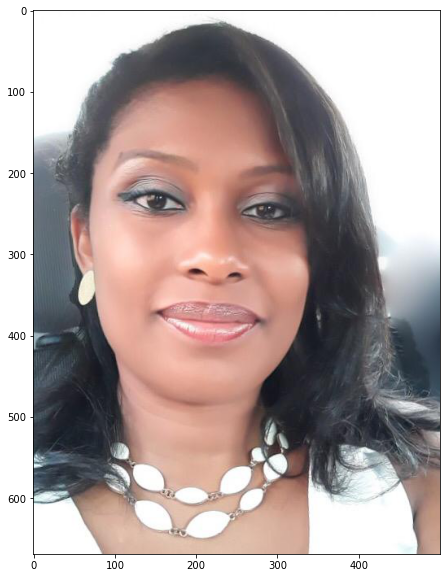

In [23]:
plt.figure(figsize=(20,10))
plt.imshow(imagem)

In [27]:
classificador_dlib_68_path = "classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()

In [43]:
def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    if len(retangulos) == 0: 
        return None
    
    for k,d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255,255,0),2)
    return imagem

In [44]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)

Identificado rosto 0


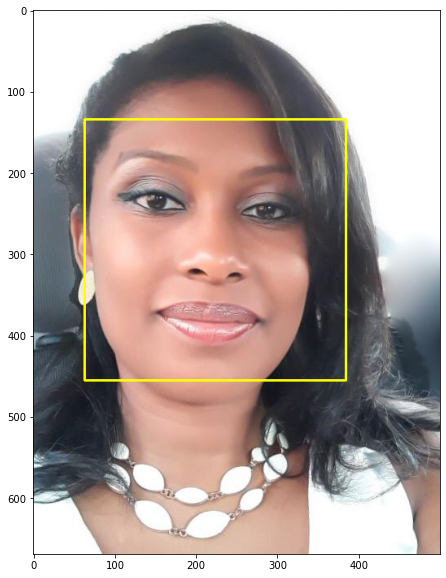

In [45]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [51]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem, ret).parts()]))

    return marcos

In [52]:
marcos_faciais = pontos_marcos_faciais(imagem)

In [53]:
len(marcos_faciais)

1

In [54]:
len(marcos_faciais[0])

68

In [88]:
def anotar_marcos_faciais(imagem, marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate (marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255, 255, 0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)
            
    return imagem

In [89]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

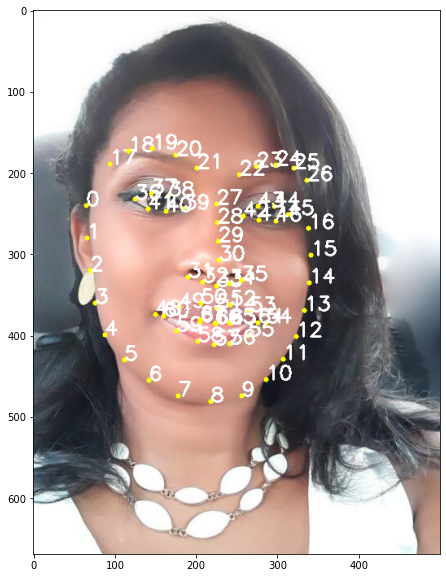

In [90]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)